### Project 2: Support vector machines and CIFAR10, figures

In this notebook are scripts which can be used to generate the figures presented in the report from pre-calculated results.

In [1]:
# Load modules
import matplotlib.pyplot as plt
import numpy as np


---
## Effect of different number of cross-validation folds on model accuracy

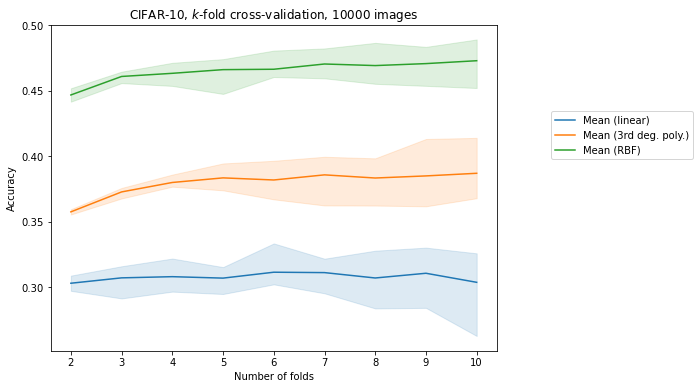

In [2]:
# Load previously calculated results
test_acc_mean_lin = np.loadtxt('saved_results/sklearn_svm_cifar10_data/sklearn_svm_cifar10_folds_10000images_lin_mean.txt')
test_acc_max_lin = np.loadtxt('saved_results/sklearn_svm_cifar10_data/sklearn_svm_cifar10_folds_10000images_lin_max.txt')
test_acc_min_lin = np.loadtxt('saved_results/sklearn_svm_cifar10_data/sklearn_svm_cifar10_folds_10000images_lin_min.txt')

test_acc_mean_pol = np.loadtxt('saved_results/sklearn_svm_cifar10_data/sklearn_svm_cifar10_folds_10000images_pol_mean.txt')
test_acc_max_pol = np.loadtxt('saved_results/sklearn_svm_cifar10_data/sklearn_svm_cifar10_folds_10000images_pol_max.txt')
test_acc_min_pol = np.loadtxt('saved_results/sklearn_svm_cifar10_data/sklearn_svm_cifar10_folds_10000images_pol_min.txt')
 
test_acc_mean_rbf = np.loadtxt('saved_results/sklearn_svm_cifar10_data/sklearn_svm_cifar10_folds_10000images_rbf_mean.txt')
test_acc_max_rbf = np.loadtxt('saved_results/sklearn_svm_cifar10_data/sklearn_svm_cifar10_folds_10000images_rbf_max.txt')
test_acc_min_rbf = np.loadtxt('saved_results/sklearn_svm_cifar10_data/sklearn_svm_cifar10_folds_10000images_rbf_min.txt')

# Range of cross-validation folds
n_folds_range = np.arange(2,11,1)

# Plot the accuracy as a function of number of folds
plt.figure(figsize=(8,6))
plt.plot(n_folds_range, test_acc_mean_lin, color='tab:blue', label='Mean (linear)')
plt.fill_between(n_folds_range, test_acc_min_lin, test_acc_max_lin, alpha=0.15, color='tab:blue')

plt.plot(n_folds_range, test_acc_mean_pol, color='tab:orange', label='Mean (3rd deg. poly.)')
plt.fill_between(n_folds_range, test_acc_min_pol, test_acc_max_pol, alpha=0.15, color='tab:orange')

plt.plot(n_folds_range, test_acc_mean_rbf, color='tab:green', label='Mean (RBF)')
plt.fill_between(n_folds_range, test_acc_min_rbf, test_acc_max_rbf, alpha=0.15, color='tab:green')

plt.xlabel('Number of folds')
plt.ylabel('Accuracy')
plt.title('CIFAR-10, $k$-fold cross-validation, 10000 images')
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 0.75))

plt.rc('font', size=14)
plt.rc('legend', fontsize=12)



---
## Effect of varying the regularization parameter on model accuracy

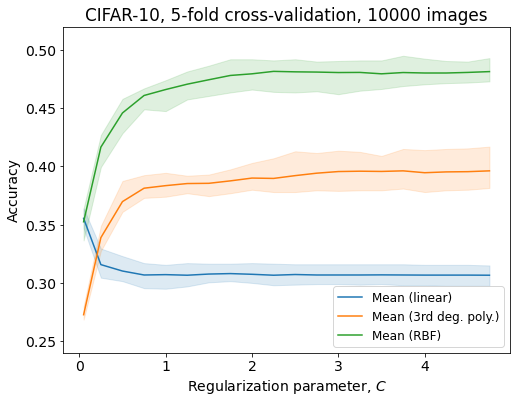

In [3]:
# Load previously calculated results
acc_C_linear = np.loadtxt('saved_results/sklearn_svm_cifar10_data/sklearn_svm_cifar10_C_linearkernel_crossval5_10000images.txt')
acc_C_linear_mean = np.mean(acc_C_linear, axis=1)
acc_C_linear_max = np.amax(acc_C_linear, axis=1)
acc_C_linear_min = np.amin(acc_C_linear, axis=1)

acc_C_poly = np.loadtxt('saved_results/sklearn_svm_cifar10_data/sklearn_svm_cifar10_C_polykernel_crossval5_10000images.txt')
acc_C_poly_mean = np.mean(acc_C_poly, axis=1)
acc_C_poly_max = np.amax(acc_C_poly, axis=1)
acc_C_poly_min = np.amin(acc_C_poly, axis=1)

acc_C_rbf = np.loadtxt('saved_results/sklearn_svm_cifar10_data/sklearn_svm_cifar10_C_rbfkernel_crossval5_10000images.txt')
acc_C_rbf_mean = np.mean(acc_C_rbf, axis=1)
acc_C_rbf_max = np.amax(acc_C_rbf, axis=1)
acc_C_rbf_min = np.amin(acc_C_rbf, axis=1)

# The regularization parameter C.
n_C_range = np.arange(0,5,0.25)
n_C_range[0] = 0.05

# Plot the accuracy as a function of the regularization parameter
plt.figure(figsize=(8,6))
plt.plot(n_C_range, acc_C_linear_mean, color='tab:blue', label='Mean (linear)')
plt.fill_between(n_C_range, acc_C_linear_min, acc_C_linear_max, alpha=0.15, color='tab:blue')

plt.plot(n_C_range, acc_C_poly_mean, color='tab:orange', label='Mean (3rd deg. poly.)')
plt.fill_between(n_C_range, acc_C_poly_min, acc_C_poly_max, alpha=0.15, color='tab:orange')

plt.plot(n_C_range, acc_C_rbf_mean, color='tab:green', label='Mean (RBF)')
plt.fill_between(n_C_range, acc_C_rbf_min, acc_C_rbf_max, alpha=0.15, color='tab:green')

plt.xlabel('Regularization parameter, $C$')
plt.ylabel('Accuracy')
plt.title('CIFAR-10, 5-fold cross-validation, 10000 images')
plt.legend(loc='lower right')
plt.ylim([0.24, 0.52])

plt.rc('font', size=14)
plt.rc('legend', fontsize=12)


## The confusion matrix
Use the RBF kernel

Files already downloaded and verified


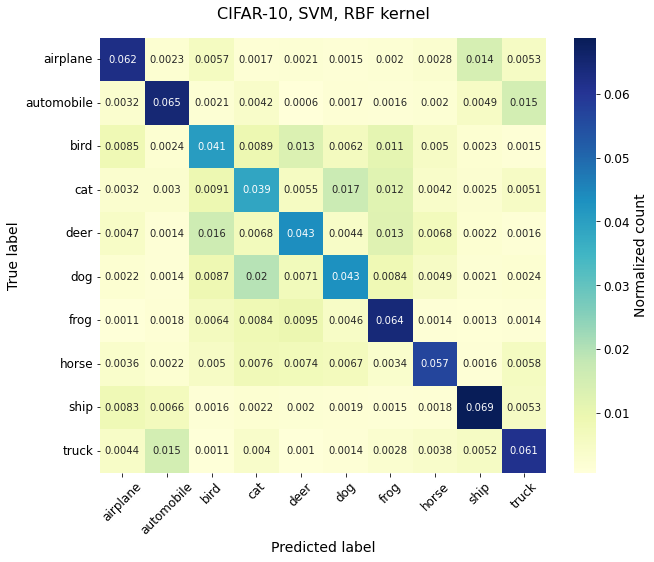

In [5]:
import seaborn as sns
import torchvision.transforms as transforms
from torchvision import datasets

# Load cifar10 data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

testdata = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

cm = np.loadtxt('saved_results/sklearn_svm_cifar10_data/sklearn_svm_cifar10_confmatrix.txt') # Pre-calculated

plt.figure(figsize=(10,8))
ax = sns.heatmap(cm, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Normalized count'})
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('CIFAR-10, SVM, RBF kernel', y=1.03)
ax.xaxis.set_ticklabels(testdata.classes)
ax.yaxis.set_ticklabels(testdata.classes)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)  # Rotates the y axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotates the x axis ticks


plt.rc('font', size=10)       # overall fontsize
plt.rc('axes', titlesize=16)  # fontsize of the title
plt.rc('axes', labelsize=14)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=12) # fontsize of the x tick labels
plt.rc('ytick', labelsize=12) # fontsize of the y tick labels